# 1- Perkenalan 

Nama : Ucik Refani Kurnia Sari

Kelas : FTDS Remote 016

Objective : Memprediksi rata-rata harga Avocado menggunakan beberapa model Regresi (Linear Regression, Decision Tree, Random Forest, dan XGBoost).

# Latar Belakang 
Alpukat merupakan buah yang kaya nutrisi dan menyehatkan. Kandungan mineral, protein, serat, lemak sehat, dan vitamin yang baik untuk menjaga kesehatan jantung. Mengonsumsi buah Alpukat dapat membantu menurunkan kadar LDL dan meningkatkan kadar HDL di dalam tubuh. Mengkonsumsi alpukat bermanfaat untuk otak, jantung, dan pembuluh darah. sehingga, diperlukan memprediksi harga alpukat di mana Machine Learning dapat sangat membantu. 

# Problem Statement

1. Manakah region yang memiliki rata-rata harga Avocado tertinggi?
2. Apakah rata-rata harga Avocado organic sama dengan conventional?
3. Bagaimana trend rata-rata harga Avocado?
4. Berapa presentase Avocado yang terjual per tahun?

# 2- Import Libraries

In [25]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.model_selection import GridSearchCV
import joblib
import pickle

# 3 - Data Loading

In [26]:
#Load Data
data = pd.read_csv('avocado.csv')

In [27]:
#Display the top 5 rows
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [28]:
#Display the bottom 5 rows
data.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [29]:
#See number of rows and columns
data.shape

(18249, 14)

dataframe terdiri dari 18249 baris dan 14 kolom

In [30]:
#Checking the datatype of each columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [31]:
#Delete Columns
data.drop('Unnamed: 0', axis=1 , inplace=True)

tidak terdapat missing value pada dataset.
dataset terdiri dari integer, float, dan object.

# 4 - Exploratory Data Analysis (EDA)

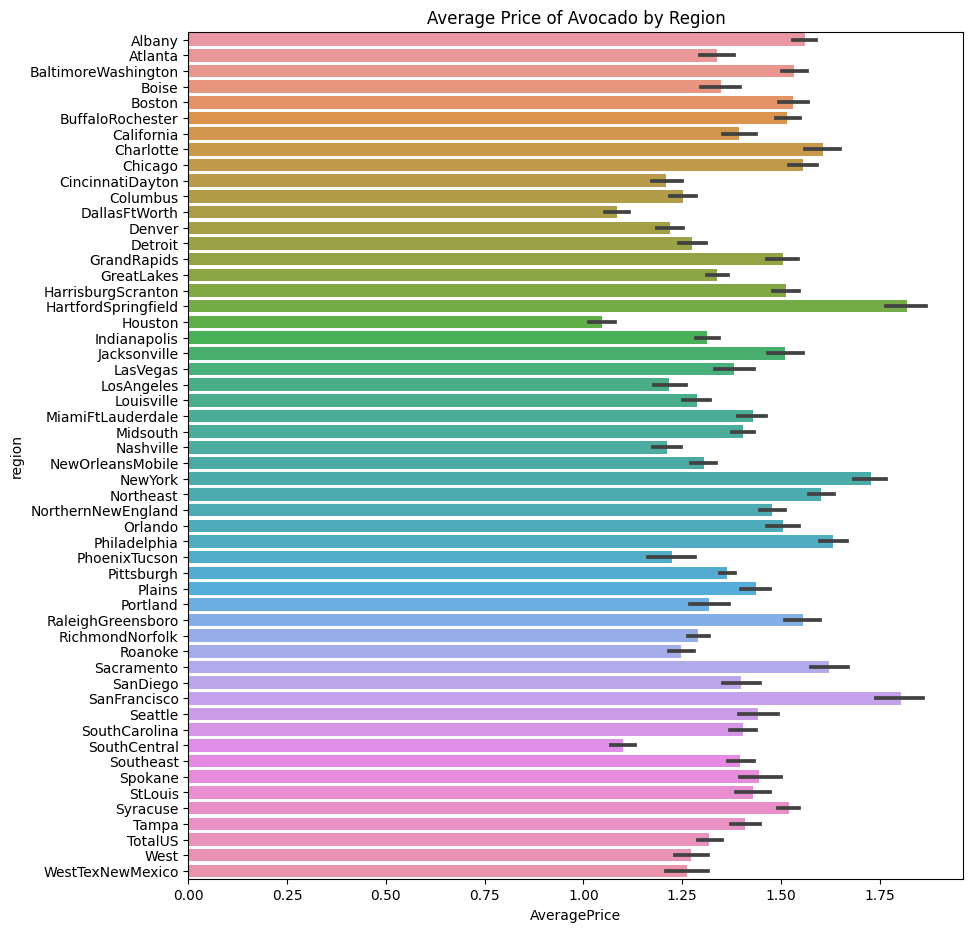

In [32]:
# The average prices by regions

plt.figure(figsize=(10,11))
plt.title("Average Price of Avocado by Region")
Av= sns.barplot(x="AveragePrice",y="region",data= data)

rata-rata harga tertinggi pada wilayah HartfordSpringfield dan SanFrancisco. 

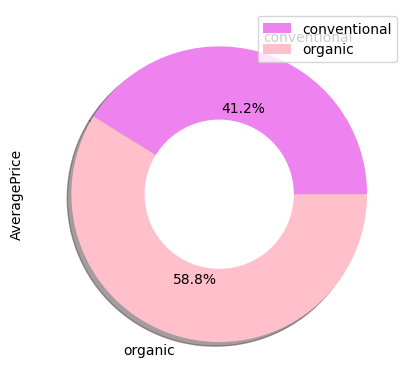

In [33]:
#Create pie chart
data.groupby(['type']).mean().plot(kind='pie', y= 'AveragePrice', autopct='%1.1f%%', shadow=True, colors = ['violet', 'pink'])
#Plotting the donut chart
my_circle = plt.Circle((0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Rata-rata harga Avocado Organic lebih mahal daripada harga avocado biasa. karena Avocado Organic bebas dari pestisida, zat beracun dan zat kimia lainnya. sehingga dianggap lebih sangat daripada yang konvensional. 

<AxesSubplot: xlabel='Date', ylabel='AveragePrice'>

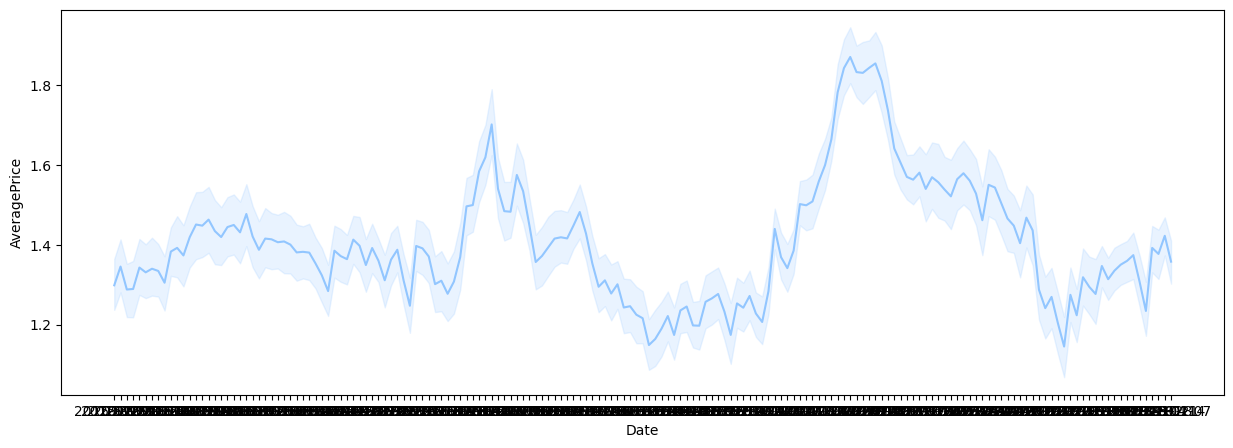

In [34]:
plt.figure(figsize=(15,5))
sns.lineplot(data=data, x='Date', y='AveragePrice')

Terjadi pelonjakan rata-rata harga Acovado pada beberapa waktu. Hal ini dikarenakan musim panen atau tidak. jika bukan musim panen harga avocado akan cenderung naik, karena permintaan yang tinggi tidak setara dengan penawaran yang ada. 

In [35]:
# Year with the major number of bags
bags_per_year = data['Total Bags'].ne(0).groupby(data['year']).sum() / len(data) * 100
bags_per_year

year
2015    30.686613
2016    30.774289
2017    31.355143
2018     7.101759
Name: Total Bags, dtype: float64

Text(0, 0.5, 'Sales in %')

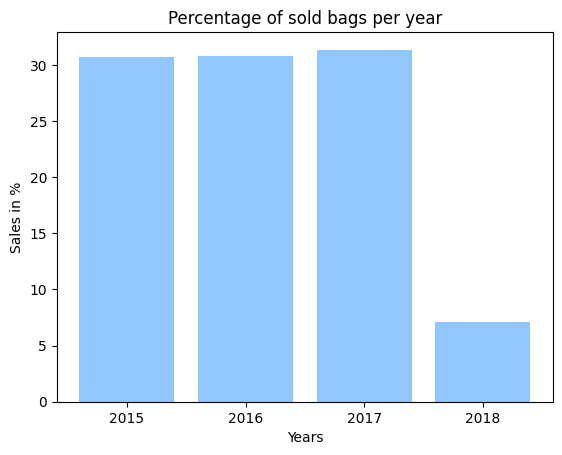

In [36]:
# plotting the data
years = ['2015', '2016', '2017', '2018']
plt.style.use('seaborn-pastel')
fig, ax = plt.subplots()
ax.bar(years, bags_per_year)
ax.set_title('Percentage of sold bags per year')
ax.set_xlabel('Years')
ax.set_ylabel('Sales in %')

Jumlah Avocado yang terjual tertinggi yaitu pada tahun 2017 yaitu 31,35%, dan yang terendah pada tahun 2018 hanya 7,101%. 

In [37]:
#Numerical data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


tidak terdapat missing value pada setiap kolom. 
average price memiliki mean kurang lebih hampir sama dengan 50%nya. sehingga dapat dikatakan data terdistribusi normal. 

In [38]:
# Categorical data
data.describe(include = "O").T

,count,unique,top,freq
Date,18249,169,2015-12-27,108
type,18249,2,conventional,9126
region,18249,54,Albany,338


terdapat 54 region pada dataframe, dan terdapat 2 type buah avocade. 

Skew : 0.58


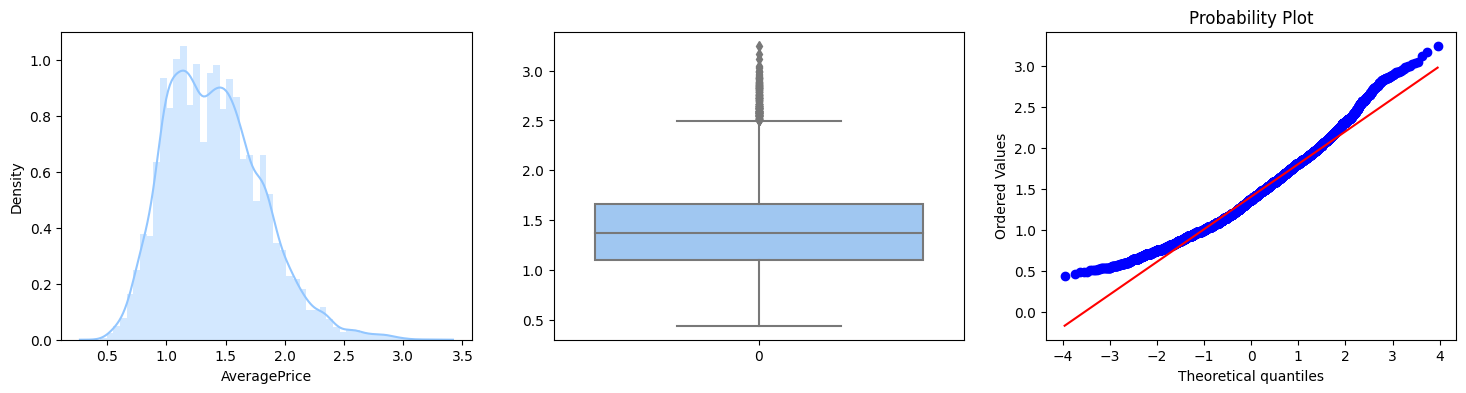

In [39]:
import seaborn as sns
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
print('Skew :',round(data.AveragePrice.skew(),2))
sns.distplot(data.AveragePrice, ax=ax[0])
sns.boxplot(data.AveragePrice, ax=ax[1])
from scipy import stats
stats.probplot(data['AveragePrice'], plot=ax[2])
plt.show()

jika dilihat berdasarkan plot harga rata-rata mendekati distribusi normal. 
kolom average price terdistribusi tidak normal karena nilai skew diatas 0.5.
terdapat banyak outlier. 

# 5 - Data Preprocessing

# Feature Selection

<AxesSubplot: >

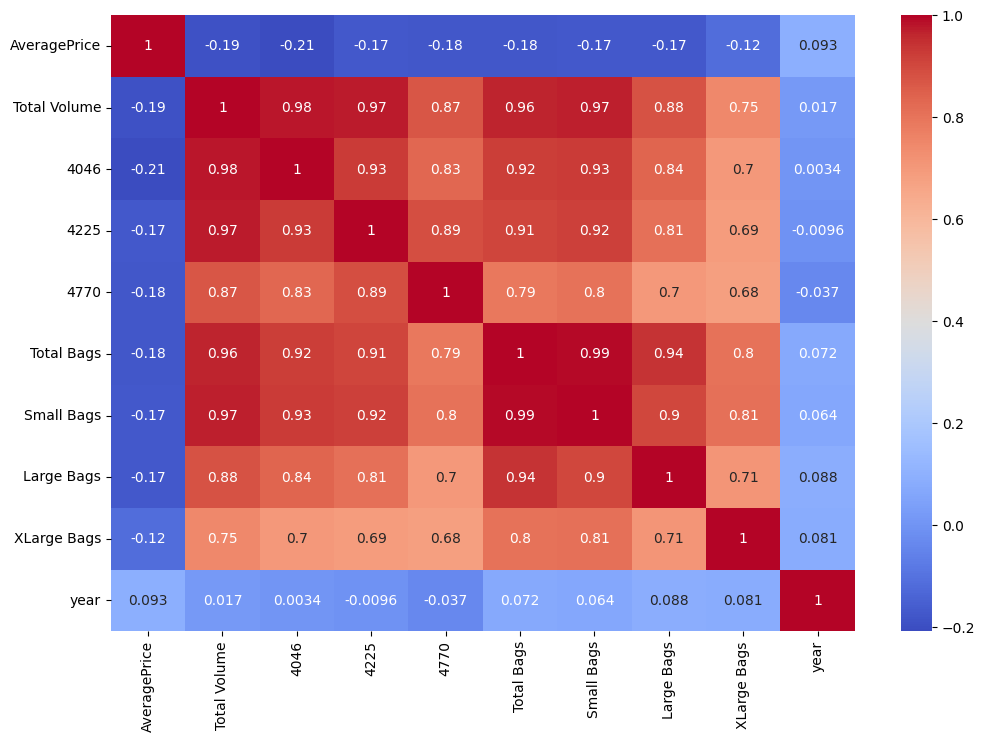

In [40]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap= 'coolwarm')

Total bag (99), Small Bag (99) dan Total Volume (98) memiliki korelasi yang kuat.

In [41]:
#Delete Columns
data = data.drop(['4225', '4046', '4770', 'Date', 'year', 'type', 'region'], axis=1)

# Split Model Inference

In [42]:
#Get data for model inference
data_inf = data.sample(10, random_state=88)
data_inf

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags
8123,1.89,57493.94,20289.47,11533.00,8688.60,67.87
14677,0.99,380211.61,260466.17,36003.44,224462.73,0.00
3212,1.15,205367.45,51414.29,45426.62,5987.67,0.00
10032,2.39,2606.30,51.02,47.69,3.33,0.00
12913,1.28,13399.83,6259.11,5175.32,1083.79,0.00
8808,0.97,289527.53,94858.85,82271.42,12267.43,320.00
12136,1.24,1660.38,1211.13,223.33,987.80,0.00
16403,2.21,8464.73,5745.89,5739.22,6.67,0.00
14272,1.58,5893.40,2556.02,2435.41,120.61,0.00
8489,1.13,98540.22,19364.35,8633.09,10707.93,23.33


In [43]:
#Remove inference set from dataset
data_train_test= data.drop(data_inf.index)
data_train_test

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.33,64236.62,8696.87,8603.62,93.25,0.0
1,1.35,54876.98,9505.56,9408.07,97.49,0.0
2,0.93,118220.22,8145.35,8042.21,103.14,0.0
3,1.08,78992.15,5811.16,5677.40,133.76,0.0
4,1.28,51039.60,6183.95,5986.26,197.69,0.0
...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,13066.82,431.85,0.0
18245,1.71,13888.04,9264.84,8940.04,324.80,0.0
18246,1.87,13766.76,9394.11,9351.80,42.31,0.0
18247,1.93,16205.22,10969.54,10919.54,50.00,0.0


In [44]:
#Reset Index 
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.89,57493.94,20289.47,11533.00,8688.60,67.87
1,0.99,380211.61,260466.17,36003.44,224462.73,0.00
2,1.15,205367.45,51414.29,45426.62,5987.67,0.00
3,2.39,2606.30,51.02,47.69,3.33,0.00
4,1.28,13399.83,6259.11,5175.32,1083.79,0.00
5,0.97,289527.53,94858.85,82271.42,12267.43,320.00
6,1.24,1660.38,1211.13,223.33,987.80,0.00
7,2.21,8464.73,5745.89,5739.22,6.67,0.00
8,1.58,5893.40,2556.02,2435.41,120.61,0.00
9,1.13,98540.22,19364.35,8633.09,10707.93,23.33


# Split X (Features) and y (Target)

In [45]:
#Split X and y
X = data_train_test.drop(['AveragePrice'], axis=1)
y= data_train_test ['AveragePrice']
X

,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags
0,64236.62,8696.87,8603.62,93.25,0.0
1,54876.98,9505.56,9408.07,97.49,0.0
2,118220.22,8145.35,8042.21,103.14,0.0
3,78992.15,5811.16,5677.40,133.76,0.0
4,51039.60,6183.95,5986.26,197.69,0.0
...,...,...,...,...,...
18234,17074.83,13498.67,13066.82,431.85,0.0
18235,13888.04,9264.84,8940.04,324.80,0.0
18236,13766.76,9394.11,9351.80,42.31,0.0
18237,16205.22,10969.54,10919.54,50.00,0.0


tidak perlu menggunakan stratify = y karena tidak perlu melakukan pemisahan bertingkat. 

In [46]:
#Split train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)
print ('Train Size: ', X_train.shape)
print ('Test Size : ', X_test.shape)

Train Size:  (14591, 5)
Test Size :  (3648, 5)


# Handling Missing Value

In [47]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())
print(y_train.isnull().sum())
print(y_test.isnull().sum())

Total Volume    0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
dtype: int64
Total Volume    0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
dtype: int64
0
0


tidak ditemukan missing value pada dataset. 

In [48]:
#Get Numerical Columns and Categorical Columns
num_columns= X_train.columns.tolist()
print ('Numerical Columns: ', num_columns)

Numerical Columns:  ['Total Volume', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']


# Handling Outlier 

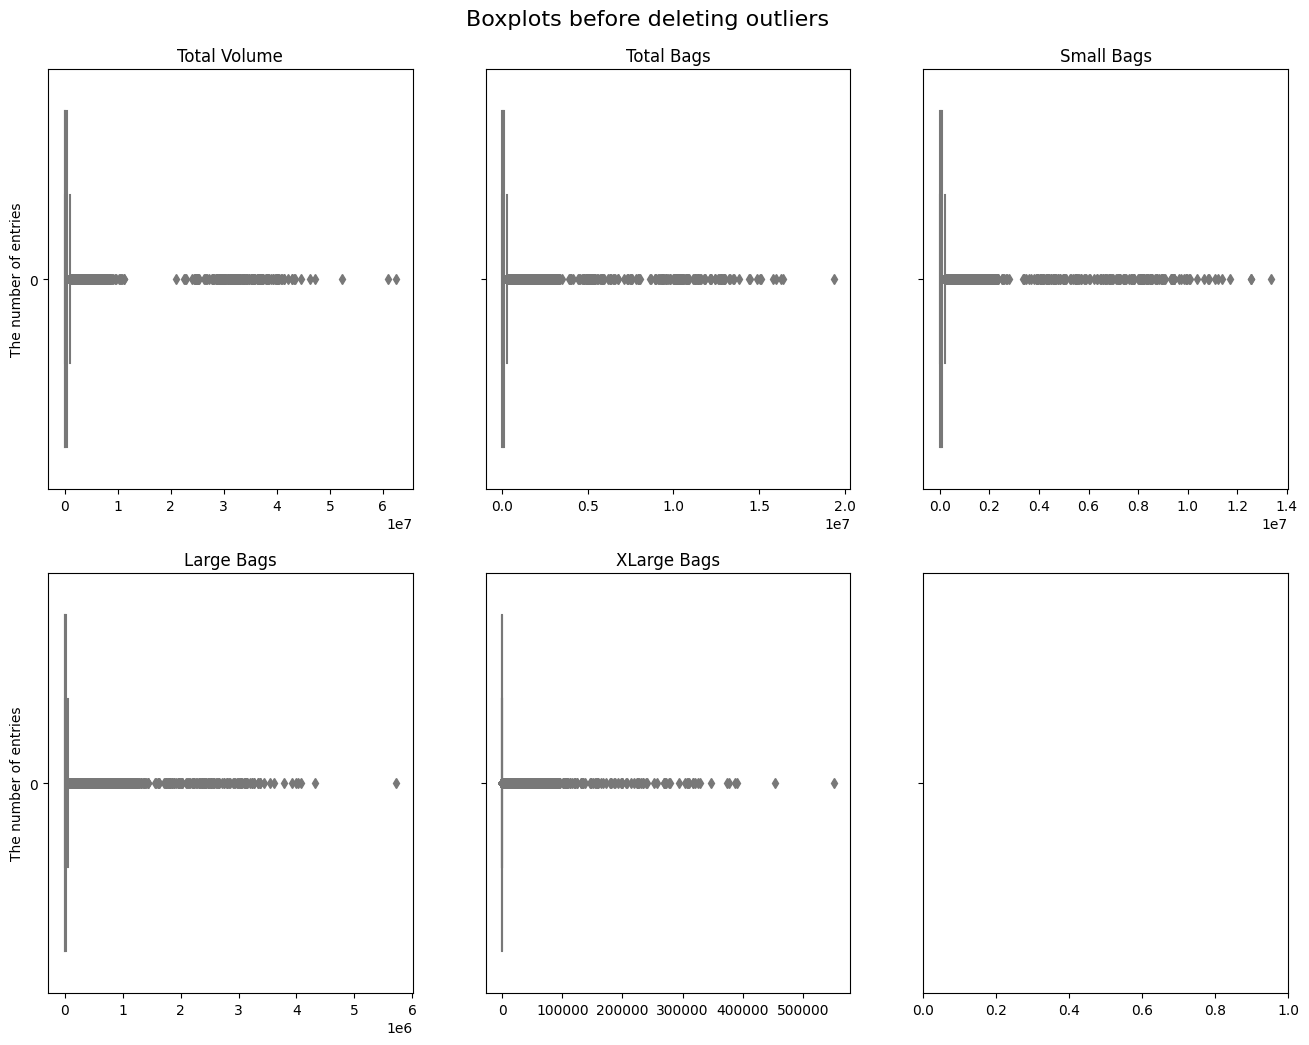

In [49]:
# outliers
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,12))
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % 3 == 0:
            axs[i].set_ylabel('The number of entries')
        sns.boxplot( data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom(dataset=data, columns_list= num_columns, rows=2, cols=3, suptitle='Boxplots before deleting outliers')

untuk distribusi Skewed, saya akan menggunakan IQR. 

In [50]:
# deleting outliers
Q1 = data[num_columns].quantile(0.25)
Q3 = data[num_columns].quantile(0.75)
IQR = Q3 - Q1
print('Here we will get IQR for each column\n',IQR)

df_filtered = data[~((data[num_columns] < (Q1 - 1.5 * IQR)) |(data[num_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
display(df_filtered.shape)

Here we will get IQR for each column
 Total Volume    422123.71
Total Bags      105694.73
Small Bags       80488.25
Large Bags       21901.78
XLarge Bags        132.50
dtype: float64


(12667, 6)

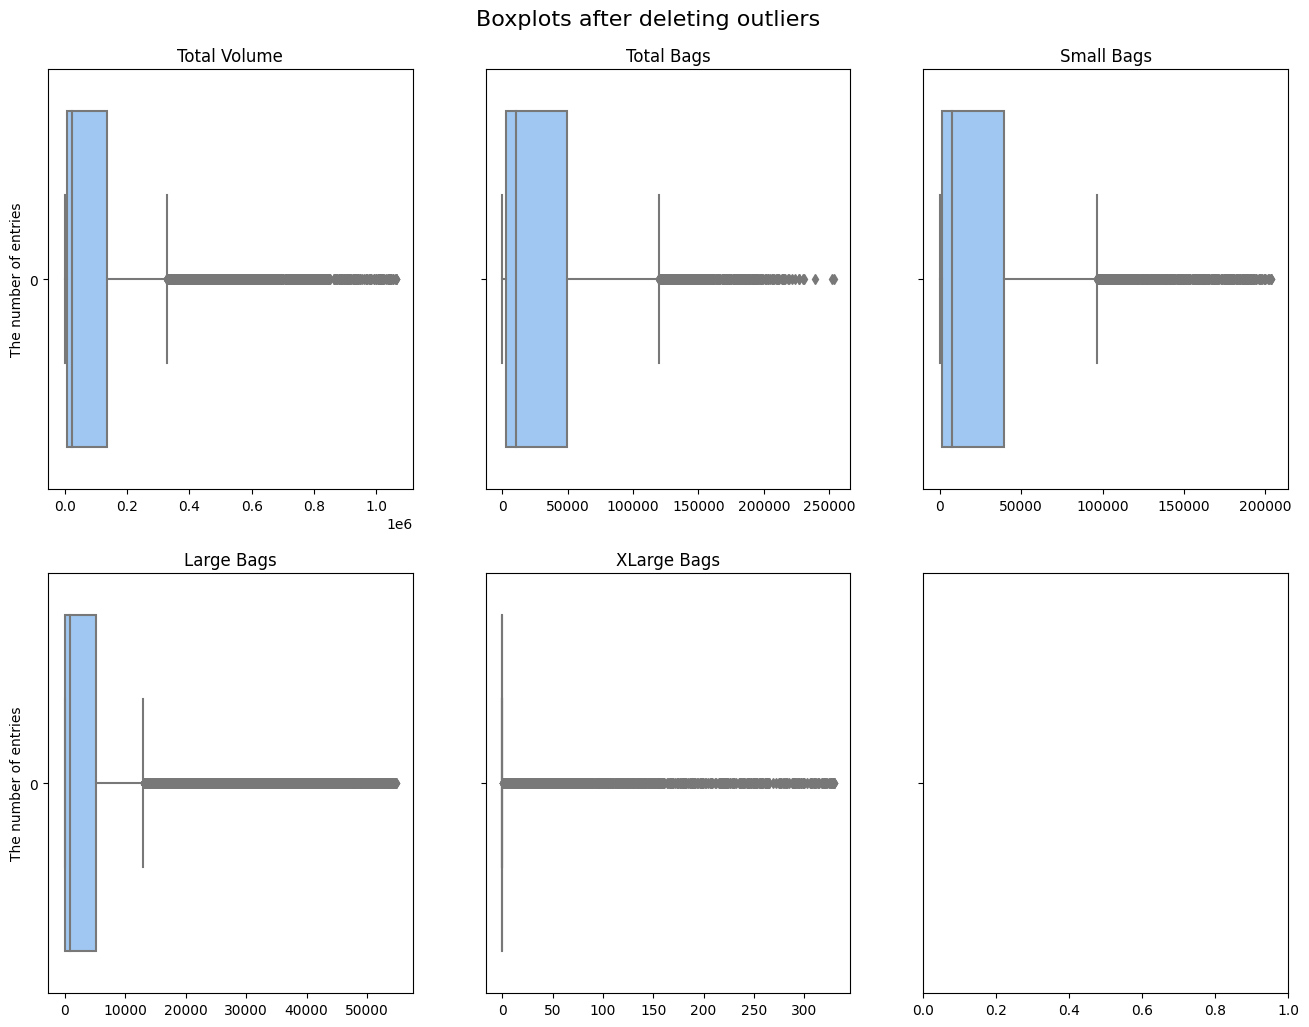

In [51]:
boxplots_custom(dataset=df_filtered, 
                columns_list=num_columns, 
                rows=2, cols=3, suptitle='Boxplots after deleting outliers')

terlihat jauh lebih baik setelah di handle outlier. 

menyiapkan pipeline untuk scaling  karena hanya ada features numerical dan melakukannya di train set. 
Membuat pipeline untuk melakukan prepocessing features, dimana:

-pipe adalah pipeline untuk scaling features numerical menggunakan StandardScaler() karena data mendekati normal. 

In [52]:
#Numeric Features Scaling
preprocessor = make_column_transformer(
    (StandardScaler(), num_columns)
)


Membuat pipeline untuk melakukan preprocessing dan juga modeling.

# 6 - Model Definition

# 6.1 - Algoritma 
menggunakan Linear Regression untuk memprediksi nilai data yang tidak diketahui dengan menggunakan nilai data yang diketahui. 
- kelebihan : melakukan generalisasi dan ekstraksi dari pola tertentu, mampu mengakuisisi pengetahuan walau tidak ada kepastian, dan mempu melakukan perhitungan secara paralel sehingga proses lebih singkat. 
- kelemahan : hasil ramalan dari analisis regresi merupakan nilai estimasi, sehingga kemungkinan untuk tidak sesuai dengan aktual tetaplah ada. 

menggunakan Decision Tree karena biasanya meniru kemampuan berpikir manusia saat membuat keputusan, sehingga mudah dimengerti, dan logika dibalik decision tree dapat dengan mudah dipahami karena menunjukkan struktur seperti pohon.

- kelebihan : sangat mudah dipahami, mampu memilih opsi yang terbaik dari seluruh opsi yang tersedia, dapat bekerja dengan variabel numerik maupub kategoris.
- kelemahan : Sifat struktur decision tree yang sangat terbuka dapat membuatnya menjadi sangat rumit, Meski struktur yang rumit bisa menghasilkan hasil yang akurat, namun juga bisa mempersempit fokus hanya pada keputusan dan masukan.

menggunakan Random Forest, gabungan dari banyak CART yang ditumbuhkan sehingga akurasi yang dihasilkan akan lebih akurat dari pohon tunggal.

- kelebihan : dapat mengatasi noise dan missing valur serta dapat mengatasi data dalam jumlah besar
- kelemahan : interpretasi yang sulit dan membutuhkan tuning model yang tepat untuk data

menggunakan Boosting model XGBoost karena dapat mengolah data yang tidak seimbang.

- Kelebihan: dapat melakukan pemrosesan paralel yang dapat mempercepat komputasi, memiliki fleksibilitas pengaturan objektif yang tinggi, dan dapat mengatasi split saat negatif loss.
- kelemahan : penentuan nilai setiap parameter tergolong sulit mengakibatkan hasil yang diperoleh terjebak pada situasi local optimum.

# 6.2 - Evaluasi Model 
menggunakan MAE score karena untuk mengukur keakuratan suatu model statistik dalam melakukan prediksi atau peramalan.
menggunakan MSE score karena karena menghasilkan kesalahan yang moderat yang lebih disukai oleh suatu peramalan yang biasanya menghasilkan kesalahan yang lebih kecil tetapi kadang-kadang menghasilkan kesalahan yang sangat besar.
menggunakan RMSE score karena mengukur tingkat kesalahan sebuah model dalam memprediksi suatu nilai numerik. nilai rata-rata kuadrat dari jumlah kesalahan pada model prediksi.
menggunakan R2 score karena mengukur seberapa besar pengaruh variabel independen tertentu terhadap variabel dependen.

# 6.3 - Hyperparameter

menggunakan hyperparamater tuning Grid Search CV karena mempermudah dalam menguji coba setiap model dan parameter model tanpa harus mencoba melakukan validasi secara manual satu per satu. Grid Search dapat diterapkan secara maksimum, apabila batas atas dan batas bawah dari masing masing parameter diketahui

Selain itu, menggunakan hyperparameter tuning Random Search karena tidak menguji semua parameter, pancarian dilakukan secara acak, sehingga memungkinakan kita untuk menentukan jumlah nilai parameter yang ingin kita uji.


# 6.4 Model Definition

- Linear Regression

    lr_model = LinearRegression()

- Decision Tree

    dec_model = DecisionTreeRegressor()

- Random Forest

    rf_model = RandomForestRegressor())

- XGB Classifier

    xgb_model = XGBRegressor()

In [53]:
lr_model = LinearRegression()

In [54]:
dec_model = DecisionTreeRegressor()

In [55]:
rf_model = RandomForestRegressor()

In [56]:
xgb_model = XGBRegressor()

In [57]:
lr_pipe = make_pipeline(preprocessor, lr_model)
dec_pipe = make_pipeline(preprocessor, dec_model)
rf_pipe = make_pipeline(preprocessor, rf_model)
xgb_pipe = make_pipeline(preprocessor, xgb_model)

# 7 - Model Training

In [58]:
lr_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Total Volume', 'Total Bags',
                                                   'Small Bags', 'Large Bags',
                                                   'XLarge Bags'])])),
                ('linearregression', LinearRegression())])

In [59]:
dec_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Total Volume', 'Total Bags',
                                                   'Small Bags', 'Large Bags',
                                                   'XLarge Bags'])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [60]:
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Total Volume', 'Total Bags',
                                                   'Small Bags', 'Large Bags',
                                                   'XLarge Bags'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [61]:
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Total Volume', 'Total Bags',
                                                   'Small Bags', 'Large Bags',
                                                   'XLarge Bags'])])),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categoric...
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_threshold=64, max_cat_to_onehot=4,
                              max_delta_step=0, max_depth=6, max_leaves=0,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1, predictor='auto',
                              random_state=0, ...))])

In [62]:
y_pred_lr_train = lr_pipe.predict(X_train)
y_pred_lr_test = lr_pipe.predict(X_test)

In [63]:
y_pred_dec_train = dec_pipe.predict(X_train)
y_pred_dec_test = dec_pipe.predict(X_test)

In [64]:
y_pred_rf_train = rf_pipe.predict(X_train)
y_pred_rf_test = rf_pipe.predict(X_test)

In [65]:
y_pred_xgb_train = xgb_pipe.predict(X_train)
y_pred_xgb_test = xgb_pipe.predict(X_test)


# 8 - Model Evaluation

In [66]:
print("MODEL EVALUATION DENGAN LINEAR REGRESSION")
print('MAE train     = ', mean_absolute_error(y_train, y_pred_lr_train))
print('MAE test      = ', mean_absolute_error(y_test, y_pred_lr_test))
print('MSE train     = ', mean_squared_error(y_train, y_pred_lr_train))
print('MSE test      = ', mean_squared_error(y_test, y_pred_lr_test))
print('RMSE train    = ', np.sqrt(mean_squared_error(y_train, y_pred_lr_train)))
print('RMSE test     = ', np.sqrt(mean_squared_error(y_test, y_pred_lr_test)))
print('r2score train = ', r2_score(y_train, y_pred_lr_train))
print('r2score test  = ', r2_score(y_test, y_pred_lr_test))
print('-'*100)

print("MODEL EVALUATION DENGAN DECISION TREE REGRESSION")
print('MAE train     = ', mean_absolute_error(y_train, y_pred_dec_train))
print('MAE test      = ', mean_absolute_error(y_test, y_pred_dec_test))
print('MSE train     = ', mean_squared_error(y_train, y_pred_dec_train))
print('MSE test      = ', mean_squared_error(y_test, y_pred_dec_test))
print('RMSE train    = ', np.sqrt(mean_squared_error(y_train, y_pred_dec_train)))
print('RMSE test     = ', np.sqrt(mean_squared_error(y_test, y_pred_dec_test)))
print('r2score train = ', r2_score(y_train, y_pred_dec_train))
print('r2score test  = ', r2_score(y_test, y_pred_dec_test))


MODEL EVALUATION DENGAN LINEAR REGRESSION
MAE train     =  0.31698728426913036
MAE test      =  0.318531407060566
MSE train     =  0.15525652409355983
MSE test      =  0.15671652366966626
RMSE train    =  0.39402604494317356
RMSE test     =  0.3958743786476542
r2score train =  0.04084228892917985
r2score test  =  0.038202221341040454
----------------------------------------------------------------------------------------------------
MODEL EVALUATION DENGAN DECISION TREE REGRESSION
MAE train     =  2.28268732360734e-19
MAE test      =  0.24568804824561402
MSE train     =  3.548008834564382e-35
MSE test      =  0.12327217653508772
RMSE train    =  5.9565164606205716e-18
RMSE test     =  0.3511013764357635
r2score train =  1.0
r2score test  =  0.24345625601155862


In [67]:
print("MODEL EVALUATION DENGAN RANDOM FOREST REGRESSION")
print('MAE train     = ', mean_absolute_error(y_train, y_pred_rf_train))
print('MAE test      = ', mean_absolute_error(y_test, y_pred_rf_test))
print('MSE train     = ', mean_squared_error(y_train, y_pred_rf_train))
print('MSE test      = ', mean_squared_error(y_test, y_pred_rf_test))
print('RMSE train    = ', np.sqrt(mean_squared_error(y_train, y_pred_rf_train)))
print('RMSE test     = ', np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print('r2score train = ', r2_score(y_train, y_pred_rf_train))
print('r2score test  = ', r2_score(y_test, y_pred_rf_test))
print('-'*100)

print("MODEL EVALUATION DENGAN GRADIENT BOOSTING REGRESSOR")
print('MAE train     = ', mean_absolute_error(y_train, y_pred_xgb_train))
print('MAE test      = ', mean_absolute_error(y_test, y_pred_xgb_test))
print('MSE train     = ', mean_squared_error(y_train, y_pred_xgb_train))
print('MSE test      = ', mean_squared_error(y_test, y_pred_xgb_test))
print('RMSE train    = ', np.sqrt(mean_squared_error(y_train, y_pred_xgb_train)))
print('RMSE test     = ', np.sqrt(mean_squared_error(y_test, y_pred_xgb_test)))
print('r2score train = ', r2_score(y_train, y_pred_xgb_train))
print('r2score test  = ', r2_score(y_test, y_pred_xgb_test))

MODEL EVALUATION DENGAN RANDOM FOREST REGRESSION
MAE train     =  0.07066671921047223
MAE test      =  0.18861014254385966
MSE train     =  0.009436625099719003
MSE test      =  0.06598501883223686
RMSE train    =  0.0971422930536386
RMSE test     =  0.25687549286032885
r2score train =  0.9417015691693218
r2score test  =  0.5950379509987878
----------------------------------------------------------------------------------------------------
MODEL EVALUATION DENGAN GRADIENT BOOSTING REGRESSOR
MAE train     =  0.15024578706019295
MAE test      =  0.19984084919813955
MSE train     =  0.04020690147818383
MSE test      =  0.07079775953434056
RMSE train    =  0.20051658654132287
RMSE test     =  0.2660784837869093
r2score train =  0.7516061897158982
r2score test  =  0.5655012869115863


jika dilihat dari MAE score, yang memiliki mae score paling kecil adalah Random Forest. 
jika dilihat dari MSE score, yang memiliki rata-rata kesalahan kuadrat paling kecil adalah Random Forest.
jika dilihat dari RMSE score, yang memiliki tingkat kesalahan hasil prediksi paling kecil adalah Random Forest.
jika dilihat dari r2 score, model Random Forest memiliki score yang lebih bagus dibandingkan dengan yang lainnya. memiliki keakuratan dalam memprediksi rata-rata harga Avocado yang lebih baik. 

Sehingga dapat disimpulkan bahwa Model Random Forest memiliki performa yang paling baik untuk melakukan prediksi. 


# Hyperparamater Tuning 

In [68]:
param_grid = [
    {'n_estimators': [3, 10, 20, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [20,30,50,70], 'max_features': [2, 4, 6, 8]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'max_features': 2, 'n_estimators': 30}
RandomForestRegressor(max_features=2, n_estimators=30)


In [69]:
final_model = grid_search.best_estimator_
X_train_prepared = preprocessor.transform(X_train)
X_test_prepared = preprocessor.transform(X_test)
final_predict = final_model.predict(X_train_prepared)
final_predictions = final_model.predict(X_test_prepared)


In [70]:
print("MODEL EVALUATION DENGAN RANDOM FOREST DENGAN HYPERPARAMETER TUNING")
print('MAE train     = ', mean_absolute_error(y_train, final_predict))
print('MAE test      = ', mean_absolute_error(y_test, final_predictions))
print('MSE train     = ', mean_squared_error(y_train, final_predict))
print('MSE test      = ', mean_squared_error(y_test, final_predictions))
print('RMSE train     = ', np.sqrt(mean_squared_error(y_train, final_predict)))
print('RMSE test     = ', np.sqrt(mean_squared_error(y_test, final_predictions)))
print('r2score train  = ', r2_score(y_train, final_predict))
print('r2score test  = ', r2_score(y_test, final_predictions))

MODEL EVALUATION DENGAN RANDOM FOREST DENGAN HYPERPARAMETER TUNING
MAE train     =  0.6525308295067737
MAE test      =  0.6618381761695906
MSE train     =  0.5440789945552433
MSE test      =  0.556788987786306
RMSE train     =  0.7376171056552603
RMSE test     =  0.7461829452529092
r2score train  =  -2.361260121634834
r2score test  =  -2.417115177742381


Hasil diperoleh lebih bagus model Random Forest tanpa hyperparameter tuning. Sedangkan, dengan Tuning diperoleh error yang cukup tinggi. 

# 9 Model Saving 

In [71]:
with open('rf_model.pkl', 'wb') as file_1:
  pickle.dump(rf_pipe, file_1)

In [72]:
with open('rf_model.pkl', 'rb') as file_1:
  rf_model = joblib.load(file_1)

# 10 - Model Inference 

In [73]:
# Display Inference Set

data_inf

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.89,57493.94,20289.47,11533.00,8688.60,67.87
1,0.99,380211.61,260466.17,36003.44,224462.73,0.00
2,1.15,205367.45,51414.29,45426.62,5987.67,0.00
3,2.39,2606.30,51.02,47.69,3.33,0.00
4,1.28,13399.83,6259.11,5175.32,1083.79,0.00
5,0.97,289527.53,94858.85,82271.42,12267.43,320.00
6,1.24,1660.38,1211.13,223.33,987.80,0.00
7,2.21,8464.73,5745.89,5739.22,6.67,0.00
8,1.58,5893.40,2556.02,2435.41,120.61,0.00
9,1.13,98540.22,19364.35,8633.09,10707.93,23.33


In [74]:
#Drop Average Price
X_data_inf = data_inf.drop(['AveragePrice'], axis=1)
y_data_inf = data_inf['AveragePrice']

In [75]:
# Predict using Linear regression

y_pred_inf = rf_model.predict(X_data_inf)
y_pred_inf

array([1.7733, 0.7835, 1.174 , 1.966 , 1.6851, 1.1094, 2.0843, 1.6766,
       1.7517, 1.1125])

In [76]:
y_pred_rf = pd.DataFrame(y_pred_inf, columns=['Predictions'])

In [77]:
final_rf_inf = pd.concat([data_inf['AveragePrice'], y_pred_rf], axis=1)
final_rf_inf.head(10)

,AveragePrice,Predictions
0,1.89,1.7733
1,0.99,0.7835
2,1.15,1.1740
3,2.39,1.9660
4,1.28,1.6851
5,0.97,1.1094
6,1.24,2.0843
7,2.21,1.6766
8,1.58,1.7517
9,1.13,1.1125


Text(0.5, 0, 'index')

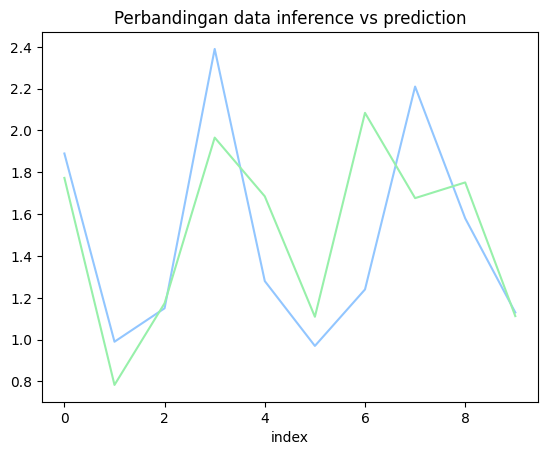

In [78]:
plt.figure
final_rf_inf['AveragePrice'].plot()
final_rf_inf['Predictions'].plot()
plt.title('Perbandingan data inference vs prediction')
plt.xlabel('index')

# 11 - Kesimpulan 

Kesimpulan yang dapat ditarik dari hasil EDA dan pemodelan dengan menggunakan 4 model regresi yang berbeda adalah: 
Avocado merupakan buah yang kaya nutrisi dan menyehatkan. Kandungan mineral, protein, serat, lemak sehat, dan vitamin yang baik untuk menjaga kesehatan jantung. Mengonsumsi buah Avocado dapat membantu menurunkan kadar LDL dan meningkatkan kadar HDL di dalam tubuh. Mengkonsumsi Avocado bermanfaat untuk otak, jantung, dan pembuluh darah. Buah Avocado memeliki rata-rata harga tertinggi pada region HartfordSpringfield dan SanFrancisco. kemudian, berdasarkan tipe buah Acovado memiliki 2 tipe yaitu Organic dan Konvensional, dimana harga Organic lebih mahal daripada Conventional. Karena Avocado Organic bebas dari pestisida, zat beracun dan zat kimia lainnya. sehingga dianggap lebih sangat daripada yang konvensional. Berdasarkan trend rata-rata harga Avocado, Terjadi pelonjakan rata-rata harga Acovado pada beberapa waktu. Hal ini dikarenakan musim panen atau tidak. jika bukan musim panen harga avocado akan cenderung naik, karena permintaan yang tinggi tidak setara dengan penawaran yang ada. Selanjutnya berdasarkan tahun, jumlah Avocado yang terjual tertinggi yaitu pada tahun 2017 yaitu 31,35%, dan yang terendah pada tahun 2018 hanya 7,101%. 
Setelah dilakukan EDA, melakukan features selection dengan menghitung korelasi pada setiap kolom, sehingga diperoleh 5 features untuk digunakan pemodelan. Terdapat 4 algoritma pemodelan yaitu Linear Regression, Decision Tree, Random Forest dan XGBoost. Selanjutnya, diperoleh model dengan performa yang paling baik, yaitu Random Forest dan dilakukan Hyperparameter tuning GridSearchCV dengan best hyperparameter. Namun, diperoleh hasil bahwa model Random Forest tanpa hyperparameter tuning memiliki error yang jauh lebih kecil daripada dengan hyperparameter tuning. sehingga model Random Forest tanpa hyperparameter tuning akan digunakan untuk model inference. Berdasarkan plot perbedaan data inference dan prediksi memiliki alur plot yang sama, namun hanya berbeda lebih besar/ lebih kecil dari nilai aktual. 
untuk analisa lebih lanjut, kita dapat memaksimalkan model kita dengan hyperparameter tuning yang tepat sehingga terjadi improvement pada model baseline. 
